In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('T1199-20220524-1217.csv')
data.head()

,id,value,feed_id,created_at,lat,lon,ele
0,0F0DW4PQ6VCYVWYS9WEGQ14SYG,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-23 23:49:12 UTC,NaN,NaN,NaN
1,0F0DW7KQ3J6M27T02DW79A73EQ,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-23 23:54:17 UTC,NaN,NaN,NaN
2,0F0DWAGT7QRVT2QC1SKZA7MA9N,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-23 23:59:22 UTC,NaN,NaN,NaN
3,0F0DWDDXZRG6NDXABCKREFQYEC,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-24 00:04:27 UTC,NaN,NaN,NaN
4,0F0DWGB20BQPD3KTNET0PCZS06,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-24 00:09:32 UTC,NaN,NaN,NaN


In [3]:
data['value'][0]

"{'result': {'ip':'111.223.26.1','id':'T1199','Date':'2022-4-24','Time':'05:14:05','Temp':36.27,'PM25':195.00,'lux':2.00,'VOC':0.00,'CO':0.66,'CO2':514.00,'O3':204.00,'RH':25.12,'Pres':993.00}}"

In [4]:
data.drop(columns=['lat', 'lon', 'ele'], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5616 non-null   object
 1   value       5616 non-null   object
 2   feed_id     5616 non-null   int64 
 3   created_at  5616 non-null   object
dtypes: int64(1), object(3)
memory usage: 175.6+ KB


In [6]:
data['Date'] = [((((i.split("'Date':"))[1]).split(","))[0]) for i in data['value']]
data['Date'] = [i[1:-1] for i in data['Date']]

In [7]:
data['Temp'] = [(float)((((i.split("'Temp':"))[1]).split(","))[0]) for i in data['value']]
data['PM25'] = [(float)((((i.split("'PM25':"))[1]).split(","))[0]) for i in data['value']]
data['lux'] = [(float)((((i.split("'lux':"))[1]).split(","))[0]) for i in data['value']]
data['VOC'] = [(float)((((i.split("'VOC':"))[1]).split(","))[0]) for i in data['value']]
data['CO'] = [(float)((((i.split("'CO':"))[1]).split(","))[0]) for i in data['value']]
data['CO2'] = [(float)((((i.split("'CO2':"))[1]).split(","))[0]) for i in data['value']]
data['O3'] = [(float)((((i.split("'O3':"))[1]).split(","))[0]) for i in data['value']]
data['RH'] = [(float)((((i.split("'RH':"))[1]).split(","))[0]) for i in data['value']]
data['Pres'] = [(float)((((i.split("'Pres':"))[1]).split("}"))[0]) for i in data['value']]

In [8]:
data['year'] = [(int)(i.split('-')[0]) for i in data['Date']]
data['month'] = [(int)(i.split('-')[1]) for i in data['Date']]
data['date'] = [(int)((i.split('-')[2]).split(' ')[0]) for i in data['Date']]

In [9]:
data.drop(columns=['value', 'feed_id', 'created_at', 'Date'], inplace=True)

In [10]:
data.head()

,id,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres,year,month,date
0,0F0DW4PQ6VCYVWYS9WEGQ14SYG,36.27,195.0,2.0,0.0,0.66,514.0,204.0,25.12,993.0,2022,4,24
1,0F0DW7KQ3J6M27T02DW79A73EQ,36.27,199.0,9.0,0.0,0.69,496.0,210.0,25.15,987.0,2022,4,24
2,0F0DWAGT7QRVT2QC1SKZA7MA9N,36.27,200.0,2.0,0.0,0.62,490.0,208.0,25.15,1003.0,2022,4,24
3,0F0DWDDXZRG6NDXABCKREFQYEC,36.27,199.0,7.0,0.0,0.57,502.0,207.0,25.22,991.0,2022,4,24
4,0F0DWGB20BQPD3KTNET0PCZS06,36.25,198.0,1.0,0.0,0.70,519.0,206.0,25.41,983.0,2022,4,24


In [11]:
data['month'].value_counts()

5    4216
4    1385
1      15
Name: month, dtype: int64

In [12]:
data[data['month'] == 5]['date'].value_counts().keys()

Int64Index([7, 14, 8, 9, 15, 10, 21, 22, 16, 6, 1, 11, 2, 5, 3, 17, 13, 24, 23,
            20],
           dtype='int64')

In [13]:
data[data['month'] == 4]['date'].value_counts().keys()

Int64Index([26, 25, 30, 24, 27, 29], dtype='int64')

In [14]:
# current week(5th May to 11th May)
# MANUAL

data_curr_week = data[data['month']==5]
data_curr_week = data_curr_week[data_curr_week['date']>=5]
data_curr_week = data_curr_week[data_curr_week['date']<=11]

## Analysis

In [15]:
data_curr_week.describe()

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres,year,month,date
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.0,1757.0,1757.000000
mean,36.417632,201.675014,4.438816,48.229937,0.630751,472.829824,207.422880,42.745788,992.027888,2022.0,5.0,8.070006
std,0.731632,16.111185,2.799556,109.310891,0.205896,122.566857,19.723614,3.449241,7.182523,0.0,0.0,1.854378
min,31.990000,176.000000,0.000000,0.000000,0.310000,400.000000,178.000000,36.010000,980.000000,2022.0,5.0,5.000000
25%,36.170000,189.000000,2.000000,0.000000,0.480000,400.000000,193.000000,40.360000,986.000000,2022.0,5.0,7.000000
50%,36.600000,200.000000,4.000000,0.000000,0.600000,400.000000,204.000000,43.110000,992.000000,2022.0,5.0,8.000000
75%,36.860000,209.000000,7.000000,37.000000,0.740000,516.000000,216.000000,44.970000,998.000000,2022.0,5.0,10.000000
max,37.320000,294.000000,9.000000,1091.000000,1.600000,1071.000000,327.000000,52.290000,1004.000000,2022.0,5.0,11.000000


In [16]:
# table

table = data_curr_week.describe().loc[['mean','min','max']].T
table.rename(columns={'mean':'Current Week Average', 'max':'Current Week Highest', 'min':'Current Week Lowest'}, inplace=True)
table = table.loc[['Temp', 'Pres', 'CO', 'CO2', 'VOC', 'lux', 'RH', 'PM25', 'O3']]
table

,Current Week Average,Current Week Lowest,Current Week Highest
Temp,36.417632,31.99,37.32
Pres,992.027888,980.00,1004.00
CO,0.630751,0.31,1.60
CO2,472.829824,400.00,1071.00
VOC,48.229937,0.00,1091.00
lux,4.438816,0.00,9.00
RH,42.745788,36.01,52.29
PM25,201.675014,176.00,294.00
O3,207.422880,178.00,327.00


### charts

In [17]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,round(y_list[i-1]/2, 1),round(y_list[i-1], 1), ha="center", color='black', fontweight='bold')

In [18]:
import matplotlib.pyplot as plt

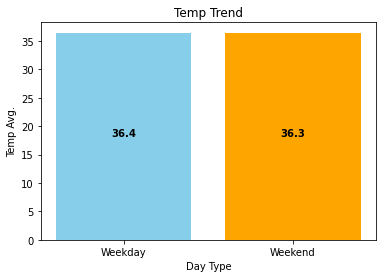

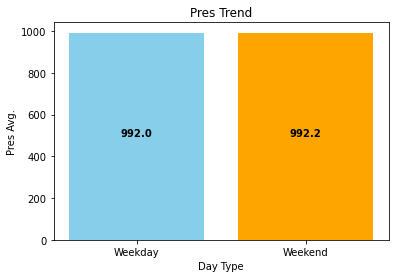

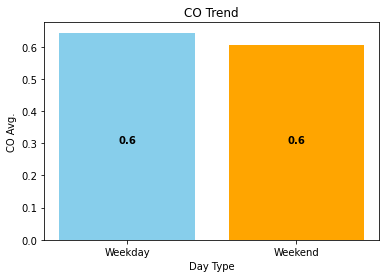

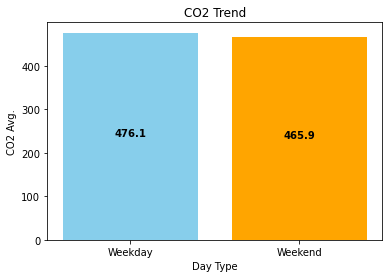

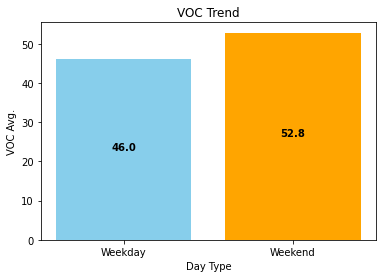

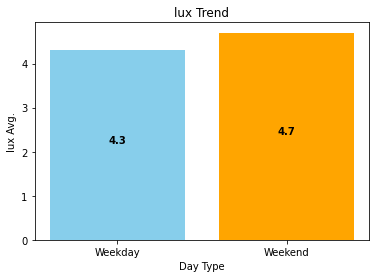

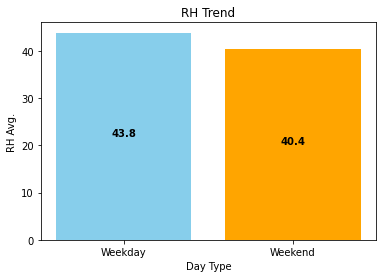

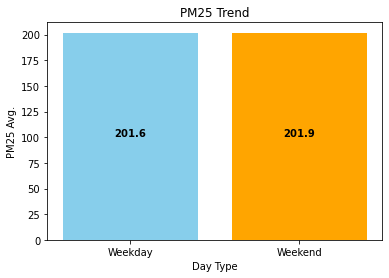

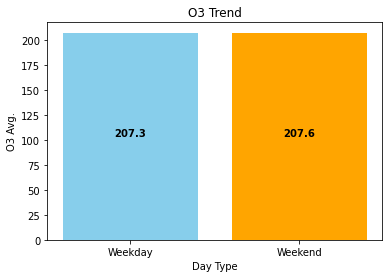

In [19]:
list_of_items = ['Temp', 'Pres', 'CO', 'CO2', 'VOC', 'lux', 'RH', 'PM25', 'O3']
colours = ['skyblue', 'orange']

# MANUAL
weekend_data = data_curr_week[(data_curr_week['date'] == 7) | (data_curr_week['date'] == 8)]
weekday_data = pd.concat([data_curr_week, weekend_data]).drop_duplicates(subset=['id'], keep=False)

for it in list_of_items :
    curr_item_list = [weekday_data[it].mean(), weekend_data[it].mean()]
    plt.bar(['Weekday', 'Weekend'], curr_item_list, color=colours)
    add_value_label(['Weekday', 'Weekend'], curr_item_list)
    plt.xlabel('Day Type')
    plt.ylabel(it+' Avg.')
    plt.title(it+' Trend')
    plt.show()

### weekday plot

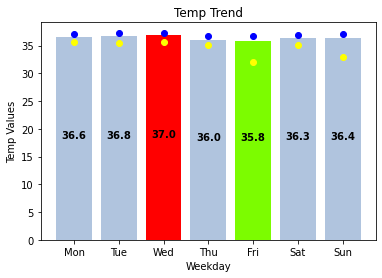

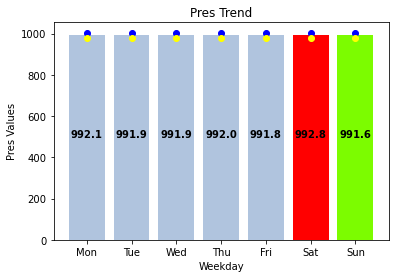

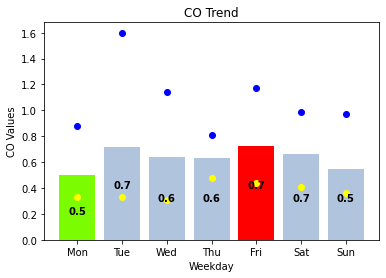

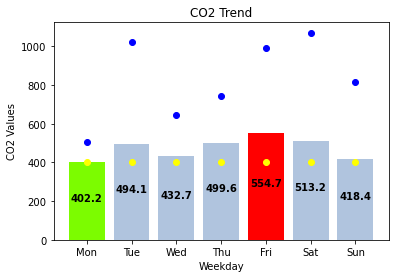

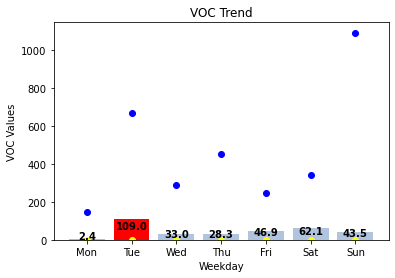

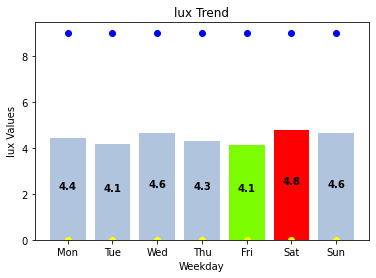

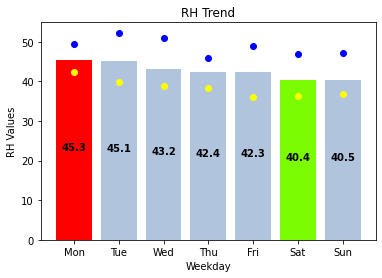

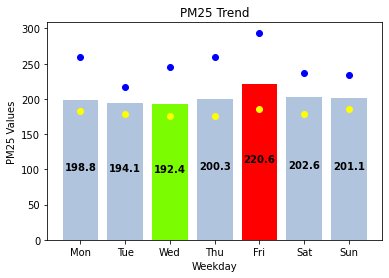

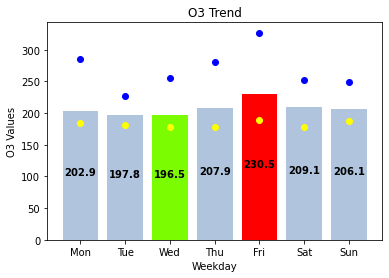

In [20]:
# MANUAL
monday_data = data_curr_week[data_curr_week['date'] == 9]
tuesday_data = data_curr_week[data_curr_week['date'] == 10]
wednesday_data = data_curr_week[data_curr_week['date'] == 11]
thursday_data = data_curr_week[data_curr_week['date'] == 5]
friday_data = data_curr_week[data_curr_week['date'] == 6]
saturday_data = data_curr_week[data_curr_week['date'] == 7]
sunday_data = data_curr_week[data_curr_week['date'] == 8]

for it in list_of_items :
    curr_item_list_avg = [monday_data[it].mean(), tuesday_data[it].mean(), wednesday_data[it].mean(), thursday_data[it].mean(), friday_data[it].mean(), saturday_data[it].mean(), sunday_data[it].mean()]
    curr_item_list_max = [max(monday_data[it]), max(tuesday_data[it]), max(wednesday_data[it]), max(thursday_data[it]), max(friday_data[it]), max(saturday_data[it]), max(sunday_data[it])]
    curr_item_list_min = [min(monday_data[it]), min(tuesday_data[it]), min(wednesday_data[it]), min(thursday_data[it]), min(friday_data[it]), min(saturday_data[it]), min(sunday_data[it])]
    days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    colour_bars = []
    for item in curr_item_list_avg :
        if item == max(curr_item_list_avg) :
            colour_bars.append('red')
        elif item == min(curr_item_list_avg) :
            colour_bars.append('lawngreen')
        else :
            colour_bars.append('lightsteelblue')
    # bar plot
    plt.bar(days_of_week, curr_item_list_avg, color=colour_bars)
    add_value_label(days_of_week, curr_item_list_avg)
    # scatter plot
    plt.scatter(days_of_week, curr_item_list_max, c='blue', zorder=2)
    plt.scatter(days_of_week, curr_item_list_min, c='yellow', zorder=2)
    plt.xlabel('Weekday')
    plt.ylabel(it+' Values')
    plt.title(it+' Trend')
    plt.show()

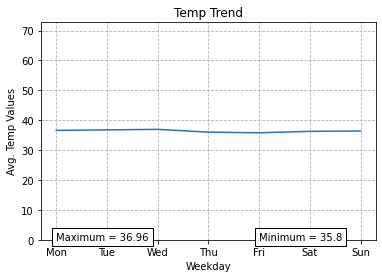

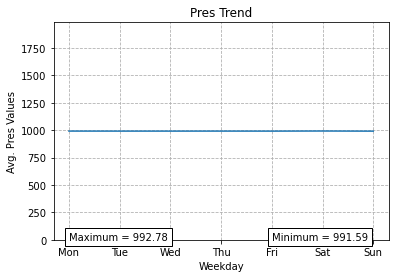

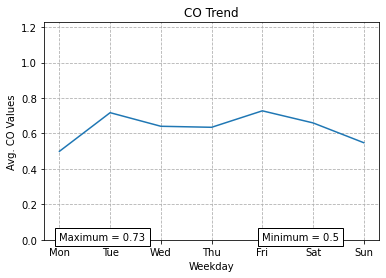

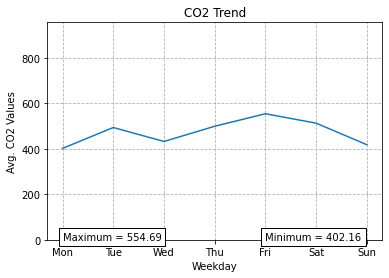

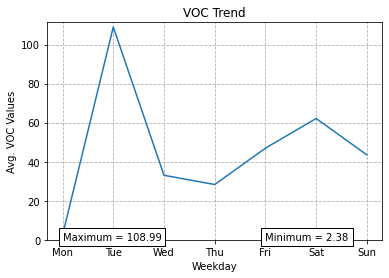

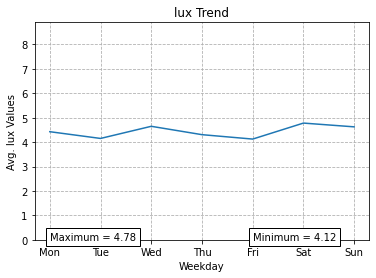

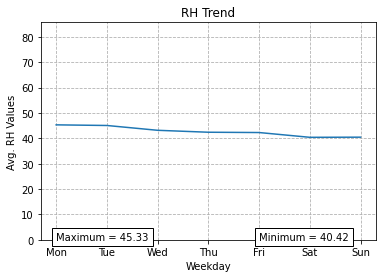

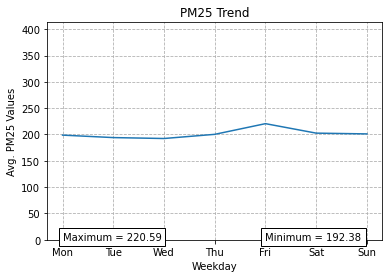

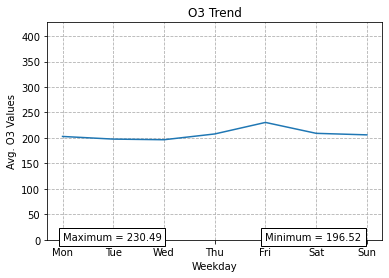

In [21]:
# MANUAL
monday_data = data_curr_week[data_curr_week['date'] == 9]
tuesday_data = data_curr_week[data_curr_week['date'] == 10]
wednesday_data = data_curr_week[data_curr_week['date'] == 11]
thursday_data = data_curr_week[data_curr_week['date'] == 5]
friday_data = data_curr_week[data_curr_week['date'] == 6]
saturday_data = data_curr_week[data_curr_week['date'] == 7]
sunday_data = data_curr_week[data_curr_week['date'] == 8]

for it in list_of_items :
    curr_item_list_avg = [monday_data[it].mean(), tuesday_data[it].mean(), wednesday_data[it].mean(), thursday_data[it].mean(), friday_data[it].mean(), saturday_data[it].mean(), sunday_data[it].mean()]
    days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    plt.grid(linestyle = '--')
    plt.ylim(0, max(curr_item_list_avg)+min(curr_item_list_avg))
    plt.plot(days_of_week, curr_item_list_avg)
    plt.xlabel('Weekday')
    # text
    plt.text('Mon', 0, 'Maximum = '+(str)(round(max(curr_item_list_avg), 2)),
             bbox={'facecolor':'white'})
    plt.text('Fri', 0, 'Minimum = '+(str)(round(min(curr_item_list_avg), 2)),
             bbox={'facecolor':'white'})
    plt.ylabel('Avg. '+it+' Values')
    plt.title(it+' Trend')
    plt.show()